In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import yfinance as yf

## yFinance API

### Installations, importing

In [1]:
!pip install yfinance

  Preparing metadata (setup.py) ... done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8489 sha256=5e36f4c637dc8e80eb25b5b825b499227ed8abbcf47ec9e8cb148076692eeef3
  Stored in directory: /Users/ivanlimsweeyong/Library/Caches/pip/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking


In [4]:
import yfinance as yf

### Downloading data

Data consists of open/high/low/close/volume and also adjusted close - adjusted close accounts for all applicable splits and dividend distributions

In [9]:
data=yf.download('AAPL','2015-01-01','2021-12-01')
df = data.copy()

[*********************100%***********************]  1 of 1 completed


In [21]:
df['close_equals_adjclose'] = (df['Close']==df['Adj Close'])
df['close_notequal_adjclose'] = df['close_equals_adjclose'].map({True:1,False:0.5})

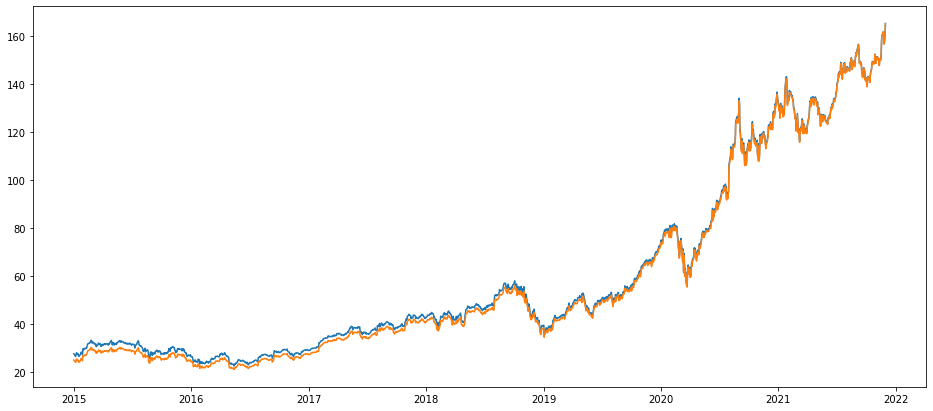

In [17]:
fig = plt.figure(figsize=(16,7))
plt.plot(df.index, df['Close'])
plt.plot(df.index, df['Adj Close'])
plt.show()

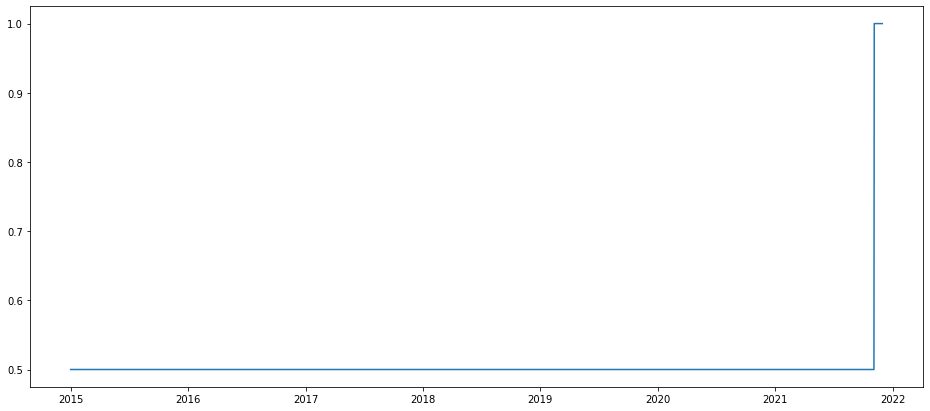

In [22]:
fig = plt.figure(figsize=(16,7))
plt.plot(df.index, df['close_notequal_adjclose'])
plt.show()

In [72]:
df

,Open,High,Low,Close,Adj Close,Volume,close_equals_adj_close,close_equals_adjclose,close_notequal_adjclose
Date,,,,,,,,,
2014-12-31,28.205000,28.282499,27.552500,27.594999,24.983654,165613600,False,False,0.5
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.745995,212818400,False,False,0.5
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.048864,257142000,False,False,0.5
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.051126,263188400,False,False,0.5
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.388376,160423600,False,False,0.5
...,...,...,...,...,...,...,...,...,...
2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900,True,True,1.0
2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600,True,True,1.0
2021-11-26,159.570007,160.449997,156.360001,156.809998,156.809998,76959800,True,True,1.0


### Function to quicksearch different stocks

In [2]:
tech_stocks = ['AAPL', 'GOOG', 'MSFT', 'FB', 'AMZN']
indices = ['^DJI', '^IXIC', '^N225', '^HSI', '^FTSE']

In [5]:
def see_plots(stock, dates):
    data=yf.download(stock,dates[0],dates[1])
    df = data.copy()
    date_change_sr = (df['Close']!=df['Adj Close']); date_change = None
    if date_change_sr.empty == False:   #there was a date change
        date_change = date_change_sr.index[0]
    #Plotting
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].plot(df.index, df['Close']); ax[0].plot(df.index, df['Adj Close'])
    ax[0].plot(df.index, df['High']); ax[0].plot(df.index, df['Low'])
    ax[0].set_title(f"Stock price for {stock}")
    plt.show()
    if date_change==None: print(f"Stock price for {stock}, close diverged on {date_change}")

[*********************100%***********************]  5 of 5 completed


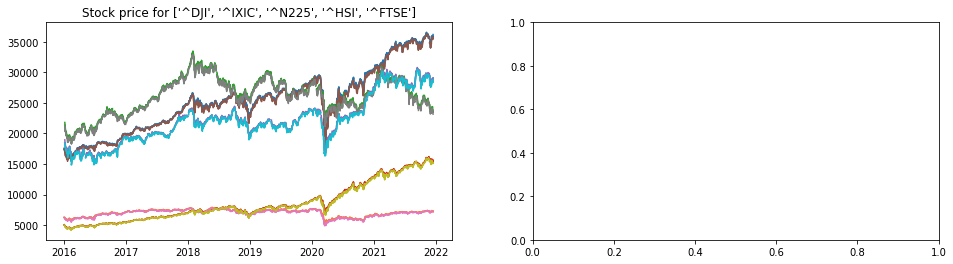

[*********************100%***********************]  5 of 5 completed


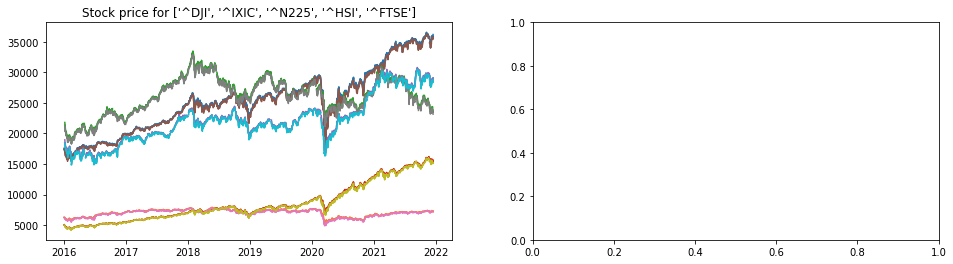

[*********************100%***********************]  5 of 5 completed


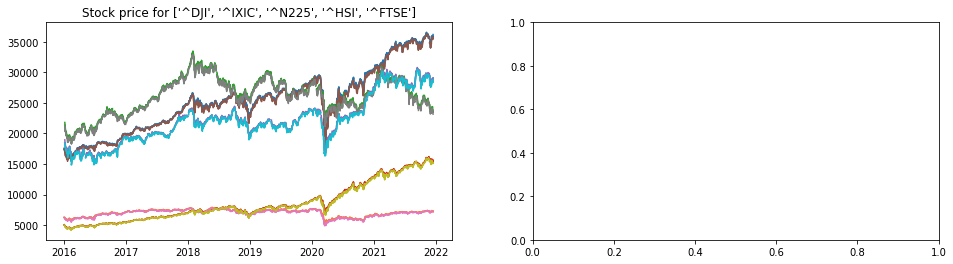

[*********************100%***********************]  5 of 5 completed


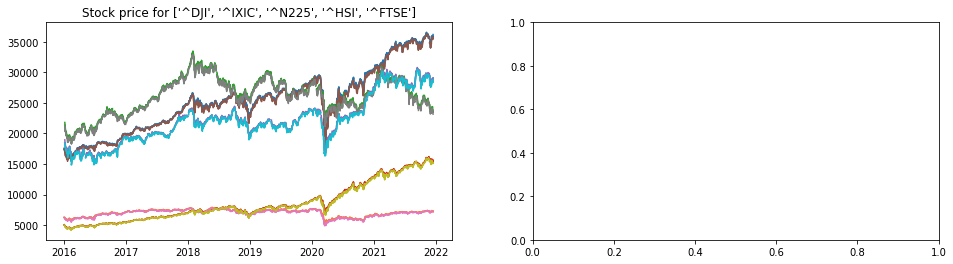

[*********************100%***********************]  5 of 5 completed


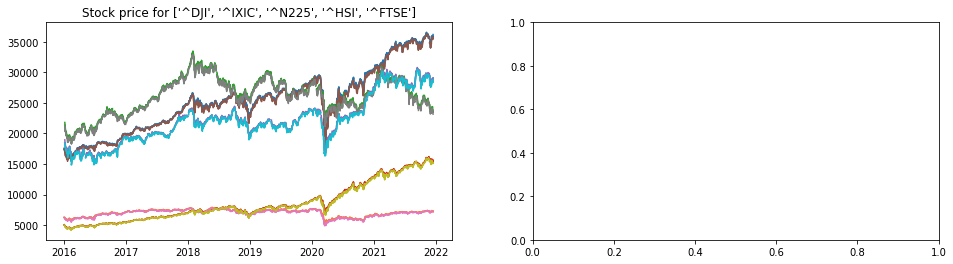

In [7]:
dates = ['2016-01-01', '2021-12-17']
for asset in tech_stocks:
    see_plots(indices, dates)

[*********************100%***********************]  1 of 1 completed


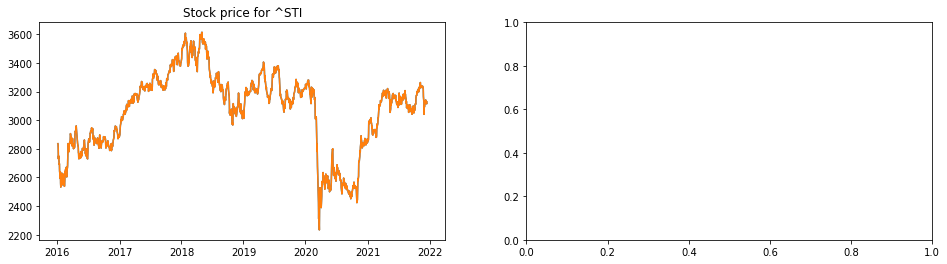

In [131]:
#For single checking of plots
temp_dates = ['2016-01-01', '2021-12-17']
see_plots("^STI", temp_dates)

In [139]:
#For accessing dataframes
data=yf.download('DJI',temp_dates[0],temp_dates[1])

[*********************100%***********************]  1 of 1 completed


### Stationarity Tests

In [138]:
from statsmodels.tsa.stattools import adfuller

In [146]:
temp_dates = ['2019-01-01', '2019-12-31']
data=yf.download('DJI',temp_dates[0],temp_dates[1])
adfuller(data['Close'])

[*********************100%***********************]  1 of 1 completed


(-2.516157594989495,
 0.11159233909220129,
 0,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 1218.5472454177066)

### Applying some indicators to plot and see

In [7]:
import ta #https://github.com/bukosabino/ta

## RNN

### Getting data
Data is downloaded for the first time and stored in the same folder as this jupyter notebook. Comment/uncomment to execute accordingly<br>
Note: Close data is not the same Adj Close data

In [84]:
#Downloading from yfinance
# df=yf.download('AAPL','2018-01-01','2020-12-31')
#Saving file to jupyter notebook folder
# df.to_csv("/Users/ivanlimsweeyong/code/ivanlimsy/jupyter/AAPL.csv")
#Retrieving file from jupyter notebook folder
df = pd.read_csv("/Users/ivanlimsweeyong/code/ivanlimsy/jupyter/AAPL.csv", index_col=0)
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

### Prepare technical indicators

In [14]:
import ta

####  Volatility - Bollinger Bands 20 days, 2 s.d. (width)

In [85]:
bol = ta.volatility.BollingerBands(df['Adj Close'], window=30, window_dev=2)
df['w_bol'] = bol.bollinger_wband()

#### Momentum - RSI 14 days

In [86]:
rsi = ta.momentum.RSIIndicator(df['Adj Close'], window=14)
df['rsi'] = rsi.rsi()

#### VIX index

In [87]:
#Downloading from yfinance
# vix_df=yf.download('^VIX','2018-01-01','2020-12-31')
#Saving file to jupyter notebook folder
# vix_df.to_csv("/Users/ivanlimsweeyong/code/ivanlimsy/jupyter/VIX.csv")
#Retrieving file from jupyter notebook folder
vix_df = pd.read_csv("/Users/ivanlimsweeyong/code/ivanlimsy/jupyter/VIX.csv", index_col=0)
vix_df.index = pd.to_datetime(vix_df.index, format='%Y-%m-%d')
vix_df.rename(columns={'Adj Close': 'vix_adj_close'}, inplace=True)
df = df.merge(vix_df[['vix_adj_close']], left_index=True, right_index=True)

#### Simple Moving Average

In [88]:
ma = ta.trend.SMAIndicator(df['Adj Close'], window=30)
df['ma_30'] = ma.sma_indicator()

#### On Balance Volume

In [89]:
obv = ta.volume.OnBalanceVolumeIndicator(df['Adj Close'], df['Volume'])

In [90]:
df['obv'] = obv.on_balance_volume()

#### Visualization of indicators

In [68]:
df2 = df.dropna(axis=0).copy()   #so as not to drop inplace

In [75]:
df2.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'h_bol', 'l_bol',
       'rsi', 'vix_adj_close', 'ma_30', 'obv', 'w_bol'],
      dtype='object')

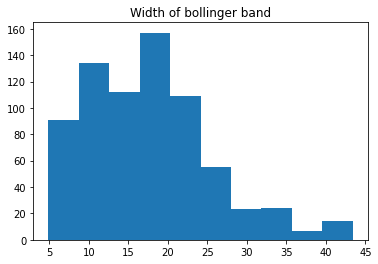

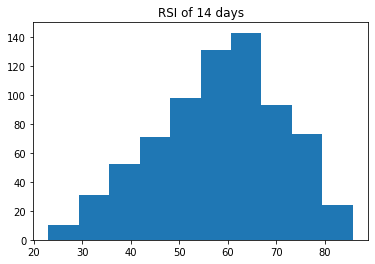

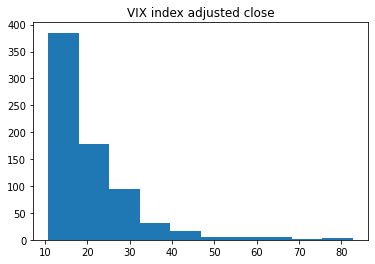

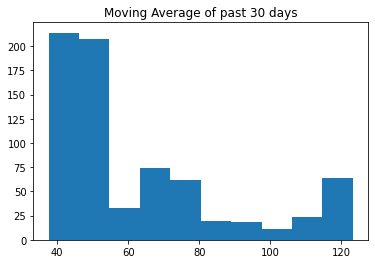

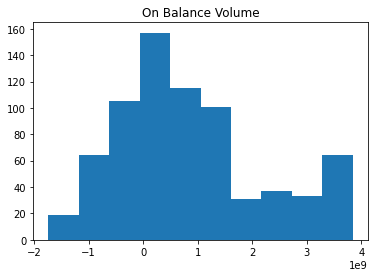

In [78]:
fig = plt.figure()
fig = plt.hist(df2['w_bol'])
plt.title("Width of bollinger band")
plt.show()
fig = plt.figure()
fig = plt.hist(df2['rsi'])
plt.title("RSI of 14 days")
plt.show()
fig = plt.figure()
fig = plt.hist(df2['vix_adj_close'])
plt.title("VIX index adjusted close")
plt.show()
fig = plt.figure()
fig = plt.hist(df2['ma_30'])
plt.title("Moving Average of past 30 days")
plt.show()
fig = plt.figure()
fig = plt.hist(df2['obv'])
plt.title("On Balance Volume")
plt.show()

### Prepare X and y data

X.shape = (n_sequences, n_observations, n_features)<br>
sequences: sequence of 30 consecutive observations of the selected features<br>
observations: a single day of selected features' values<br>
features: price and indicators

In [94]:
df2.columns

Index(['Adj Close', 'w_bol', 'rsi', 'vix_adj_close', 'ma_30', 'obv'], dtype='object')

In [129]:
df2 = df.dropna(axis=0).copy()
df2.drop(labels=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
#Tried using .iloc but not sure how to split into sequences of 30 days
# X = df2.iloc[:-5,:]
# X.drop(labels=['Adj Close'], axis=1, inplace=True)
# y = df2.iloc[5:,:][['Adj Close']]
X=[]; y=[]
for i in range(len(df2)-35):
    X.append(np.array(df2.iloc[i:(i+30),1:6]))
    y.append(np.array(df2.iloc[(i+35):(i+36),0]))
X = np.array(X)
y = np.array(y)
print(X.shape)   #(n_sequences, n_observations, n_features)
print(y.shape)

(691, 30, 5)
(691, 1)


Checkpoint: created X of 6 features:
- adj close price
- width of bollinger bands
- rsi
- vix adj close price
- ma 30 days
- on balance volume

Pointers:
- No. of rnn units refers to n number of interesting temporal features from the time series (random, unknown, selected by model)

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Normalization, Dense, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape); print(X_test.shape); print(y_train.shape); print(y_test.shape)

(552, 30, 5)
(139, 30, 5)
(552, 1)
(139, 1)


In [154]:
def initialize_model():
    model=Sequential()
#     model.add(Normalization())
    model.add(SimpleRNN(units=30, activation='sigmoid', input_shape=(30,5)))
    model.add(Dense(15,activation="linear"))
    model.add(Dense(1,activation="linear"))
    model.compile(loss='mae', optimizer='rmsprop')
    return model

In [155]:
model = initialize_model()
es = EarlyStopping(patience=5)
history = model.fit(X_train, y_train,
                    batch_size=2, verbose=1,
                    epochs= 20, validation_split=0.2)

Epoch 1/20
221/221 [==============================] - 4s 13ms/step - loss: 56.0616 - val_loss: 38.7743
Epoch 2/20
221/221 [==============================] - 2s 11ms/step - loss: 26.4277 - val_loss: 15.7846
Epoch 3/20
221/221 [==============================] - 3s 12ms/step - loss: 18.5645 - val_loss: 15.8469
Epoch 4/20
221/221 [==============================] - 2s 10ms/step - loss: 18.3510 - val_loss: 15.9636
Epoch 5/20
221/221 [==============================] - 3s 14ms/step - loss: 18.3207 - val_loss: 16.0188
Epoch 6/20
221/221 [==============================] - 2s 11ms/step - loss: 18.2951 - val_loss: 16.1333
Epoch 7/20
221/221 [==============================] - 3s 12ms/step - loss: 18.3206 - val_loss: 16.1091
Epoch 8/20
221/221 [==============================] - 2s 10ms/step - loss: 18.3083 - val_loss: 16.0068
Epoch 9/20
221/221 [==============================] - 2s 10ms/step - loss: 18.3028 - val_loss: 16.2381
Epoch 10/20
221/221 [==============================] - ETA: 0s - loss: 18

In [150]:
#Tanh
result = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 8ms/step - loss: 19.0612


In [153]:
#Relu
result = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 1793042.1250


In [156]:
#Sigmoid
result = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 18.7331


## Oanda API

In [147]:
# account = 
# token = 
headers = {'Authorization':f'Bearer {token}', 'Content-Type':'application/json'}

instrument= 'EUR_USD'
end_datetime = str(dt.datetime(2014,5,13,0,0,0)).replace(' ','T')
params = {'price':'M', 'granularity': 'M1',
          'count': 5000, 'to': end_datetime}

url = f'https://api-fxpractice.oanda.com/v3/accounts/{account}/instruments/{instrument}/candles'
response = requests.get(url, headers=headers, params=params).json()
# df = pd.DataFrame(response['candles'])


NameError: name 'token' is not defined

In [24]:
pd.DataFrame(response['candles'])

,complete,volume,time,mid
0,True,43,2014-05-07T15:14:00.000000000Z,"{'o': '1.39210', 'h': '1.39217', 'l': '1.39187..."
1,True,38,2014-05-07T15:15:00.000000000Z,"{'o': '1.39188', 'h': '1.39189', 'l': '1.39179..."
2,True,31,2014-05-07T15:16:00.000000000Z,"{'o': '1.39186', 'h': '1.39197', 'l': '1.39186..."
3,True,117,2014-05-07T15:17:00.000000000Z,"{'o': '1.39197', 'h': '1.39218', 'l': '1.39190..."
4,True,51,2014-05-07T15:18:00.000000000Z,"{'o': '1.39217', 'h': '1.39229', 'l': '1.39214..."
...,...,...,...,...
4995,True,8,2014-05-13T03:55:00.000000000Z,"{'o': '1.37573', 'h': '1.37575', 'l': '1.37573..."
4996,True,8,2014-05-13T03:56:00.000000000Z,"{'o': '1.37573', 'h': '1.37575', 'l': '1.37573..."
4997,True,1,2014-05-13T03:57:00.000000000Z,"{'o': '1.37572', 'h': '1.37572', 'l': '1.37572..."
4998,True,5,2014-05-13T03:58:00.000000000Z,"{'o': '1.37573', 'h': '1.37574', 'l': '1.37571..."


In [5]:
end_datetime.replace(' ','T')

'2020-05-13T00:00:00'